In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.metrics import r2_score

In [ ]:
def adjusted_r_squared(r_squared, shape):
    """
    Calculate the adjusted R-squared.

    Parameters:
    r_squared (float): The R-squared value.
    shape (tuple): A tuple representing the shape of the dataframe (n_rows, n_columns).
                   n_rows = number of observations (n), n_columns = number of predictors (p) + 1 (including intercept).

    Returns:
    float: Adjusted R-squared value.
    """
    n, p_plus_1 = shape  # n = number of rows (observations), p_plus_1 = number of columns (predictors + 1)
    p = p_plus_1 - 1     # p = number of predictors

    adjusted_r2 = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

    return adjusted_r2


In [ ]:
adjusted_r_squared(0.9267,(60031,46))

0.9266450112528132

In [4]:
#read csv file of flight fare dataset (reference ease my trip)
df=pd.read_csv('/content/Clean_Dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
## two letters code of airlines
df['flight'].str.split('-',expand=True)[0].value_counts()

,count
0,
UK,127859
AI,80892
6E,43120
G8,23173
I5,16098
SG,9011


In [ ]:
#quick view of data
df.sample(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
15774,15774,AirAsia,I5-548,Delhi,Early_Morning,one,Afternoon,Bangalore,Economy,7.58,30.0,3090.0
114996,114996,Vistara,UK-814,Bangalore,Night,one,Evening,Hyderabad,Economy,22.67,45.0,6262.0
25260,25260,Vistara,UK-943,Delhi,Early_Morning,one,Evening,Kolkata,Economy,9.33,30.0,8534.0
53230,53230,Air_India,AI-683,Mumbai,Night,one,Night,Bangalore,Economy,24.92,4.0,8936.0
72550,72550,Vistara,UK-875,Mumbai,Evening,zero,Night,Hyderabad,Economy,1.58,18.0,3450.0


In [ ]:
#checking shape of data
df.shape

(300153, 12)

In [ ]:
#checking null values among columns
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
#since flight name has more than 1500 categories and it is just for reference so we can drop this column
df.drop(columns='flight',inplace=True)

In [ ]:
df.head(1)

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [6]:
#first column i.e,Unnamed is just an index so we can also drop this column
df=df.iloc[:,1:]

In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


About 50%

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9e08865c7b43e66afcba891c7337b51a8805a142c295de8e5501fbda04f30864
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
#pandas profiling for EDA
profile=ProfileReport(df,explorative=True)
profile.to_file('output.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Check for duplicates
df.duplicated().sum()

2213

In [ ]:
df=df.drop_duplicates()

In [ ]:
# More info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [ ]:
df_economy=df[df['class']=='Economy']

In [ ]:
df_economy.shape

(206666, 10)

In [ ]:
df_business=df[df['class']=='Business']

In [ ]:
df_business['days_left'].max()

49

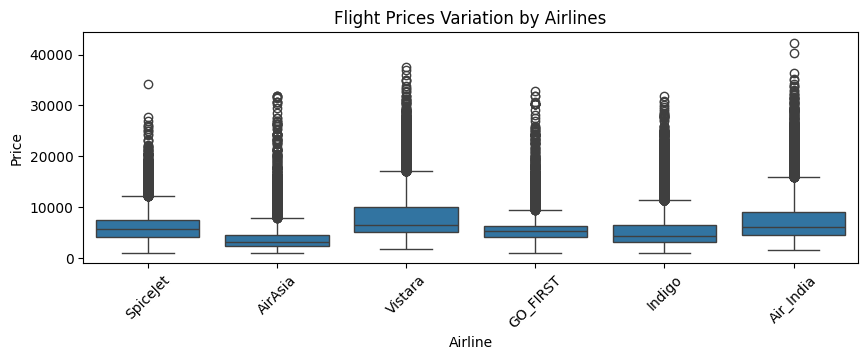

In [ ]:
#Price Distribution of economy class by airlines
plt.figure(figsize=(10, 3))
sns.boxplot(x='airline', y='price', data=df_economy)
plt.title('Flight Prices Variation by Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

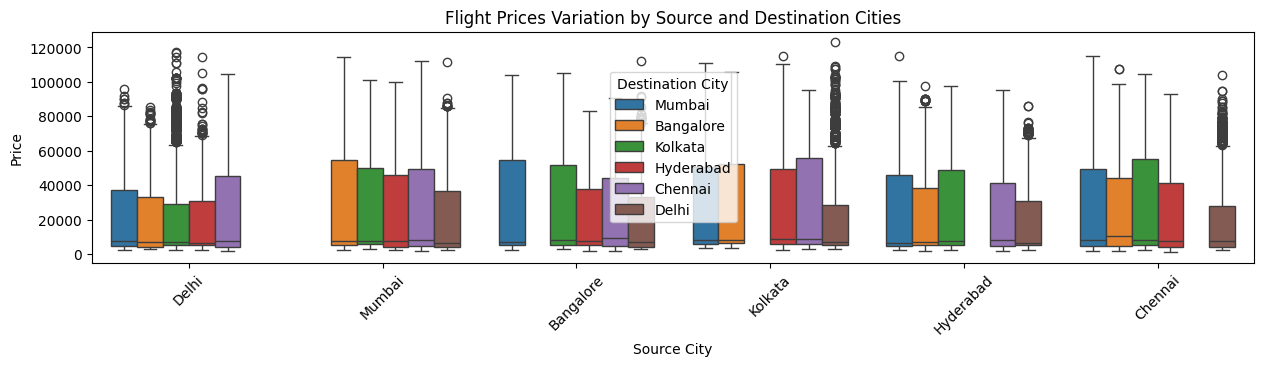

In [ ]:
#Price Distribution by Source and Destination Cities
plt.figure(figsize=(15, 3))
sns.boxplot(x='source_city', y='price', data=df, hue='destination_city')
plt.title('Flight Prices Variation by Source and Destination Cities')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Destination City')
plt.show()

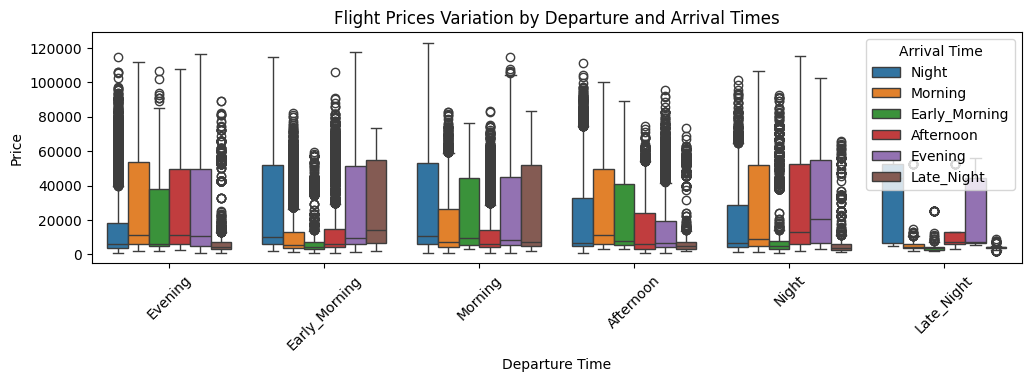

In [ ]:
#Price Distribution by Departure and Arrival Times
plt.figure(figsize=(12, 3))
sns.boxplot(x='departure_time', y='price', data=df, hue='arrival_time')
plt.title('Flight Prices Variation by Departure and Arrival Times')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Arrival Time')
plt.show()

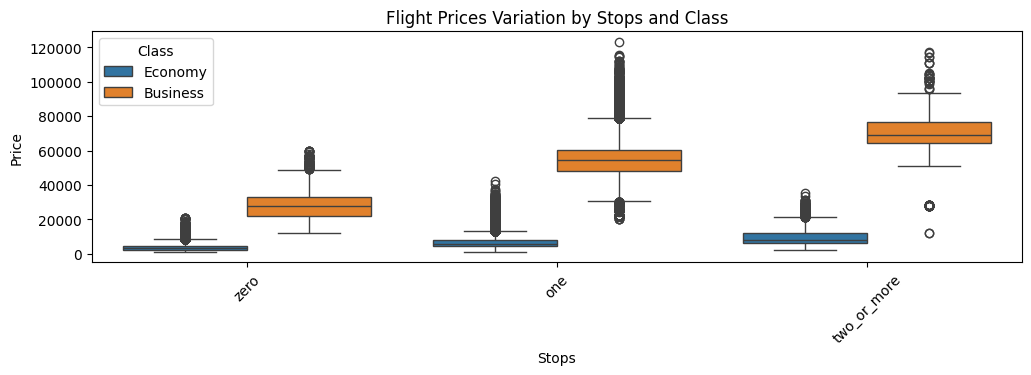

In [ ]:
#Price Distribution by Stops and Class
plt.figure(figsize=(12, 3))
sns.boxplot(x='stops', y='price', data=df, hue='class')
plt.title('Flight Prices Variation by Stops and Class')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()

In [ ]:
df[['airline','source_city','destination_city']].value_counts()

airline   source_city  destination_city
Vistara   Delhi        Mumbai              5762
          Mumbai       Delhi               5713
          Bangalore    Mumbai              5335
          Mumbai       Bangalore           5292
          Bangalore    Delhi               5243
                                           ... 
SpiceJet  Chennai      Hyderabad             43
GO_FIRST  Chennai      Hyderabad             38
          Hyderabad    Chennai               38
SpiceJet  Bangalore    Hyderabad             23
          Hyderabad    Chennai               12
Name: count, Length: 177, dtype: int64

In [ ]:
#average price of both class as per airlines
df.groupby(['airline','class'])['price'].mean()

airline    class   
AirAsia    Economy      4099.466554
Air_India  Business    47131.751482
           Economy      7313.784025
GO_FIRST   Economy      5668.456678
Indigo     Economy      5348.720367
SpiceJet   Economy      6210.620542
Vistara    Business    55570.775358
           Economy      7827.594071
Name: price, dtype: float64

In [ ]:
##total revenue by class and airlines
df.groupby(['airline','class'])['price'].sum()

airline    class   
AirAsia    Economy       65636559
Air_India  Business    1550398965
           Economy      350966554
GO_FIRST   Economy      130255466
Indigo     Economy      227160154
SpiceJet   Economy       53634919
Vistara    Business    3349695197
           Economy      521975283
Name: price, dtype: int64

In [ ]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.groupby(['class','airline','departure_time'])['price'].mean()

class     airline    departure_time
Business  Air_India  Afternoon         47229.968176
                     Early_Morning     46958.499689
                     Evening           46624.218329
                     Late_Night        47471.971014
                     Morning           46395.960988
                     Night             48720.479432
          Vistara    Afternoon         53168.351923
                     Early_Morning     56216.852885
                     Evening           56487.262526
                     Morning           56320.383944
                     Night             54512.417280
Economy   AirAsia    Afternoon          4345.543917
                     Early_Morning      4527.002979
                     Evening            4058.764561
                     Late_Night         4174.064748
                     Morning            4132.566865
                     Night              3366.107062
          Air_India  Afternoon          7482.205956
                     Early_Morning      7323.617712
                     Evening            7159.615924
                     Late_Night         7544.450980
                     Morning            7306.585536
                     Night              7386.803887
          GO_FIRST   Afternoon          5519.340802
                     Early_Morning      5674.994880
                     Evening            5605.827988
                     Late_Night         4806.554795
                     Morning            6530.037940
                     Night              4864.504900
          Indigo     Afternoon          5682.862199
                     Early_Morning      5235.814566
                     Evening            4828.227092
                     Late_Night         4317.195592
                     Morning            5927.023987
                     Night              4349.248742
          SpiceJet   Afternoon          7730.467227
                     Early_Morning      5847.023938
                     Evening            5752.979852
                     Morning            6894.052008
                     Night              5492.547209
          Vistara    Afternoon          7736.256990
                     Early_Morning      7795.808019
                     Evening            7640.369146
                     Morning            8328.035548
                     Night              7374.274668
Name: price, dtype: float64

<ipython-input-54-a71258dc89fd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x="source_city",y= "price" ,data=df_economy, palette='magma', edgecolor='white', linewidth=2, width=0.7)


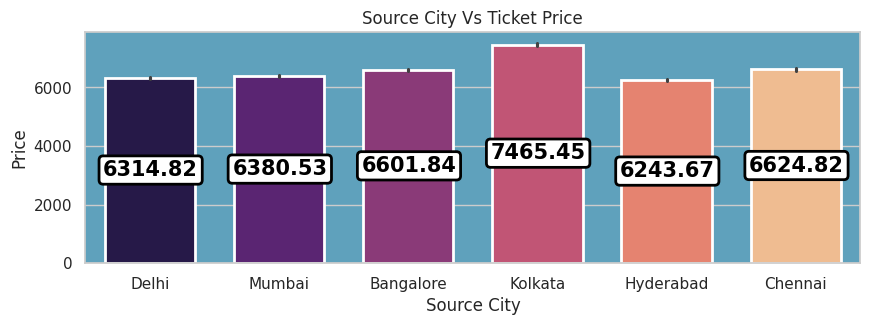

<ipython-input-54-a71258dc89fd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(y="price",x= "destination_city" ,data=df_economy, palette='magma', edgecolor='white', linewidth=2, width=0.7)


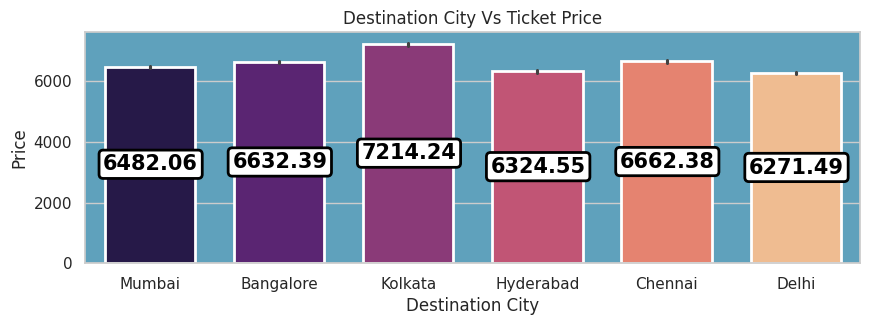

In [ ]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 3))
p = sns.barplot(x="source_city",y= "price" ,data=df_economy, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Source City Vs Ticket Price")
plt.xlabel("Source City")
plt.ylabel("Price")
plt.show()

background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 3))
p = sns.barplot(y="price",x= "destination_city" ,data=df_economy, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Destination City Vs Ticket Price")
plt.xlabel("Destination City")
plt.ylabel("Price")
plt.show()

<ipython-input-15-02675ed26a52>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x="source_city",y= "price" ,data=df_business, palette='magma', edgecolor='white', linewidth=2, width=0.7)


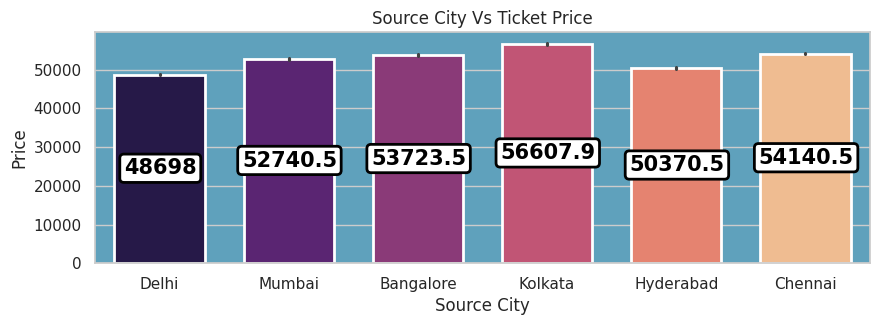

<ipython-input-15-02675ed26a52>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(y="price",x= "destination_city" ,data=df_business, palette='magma', edgecolor='white', linewidth=2, width=0.7)


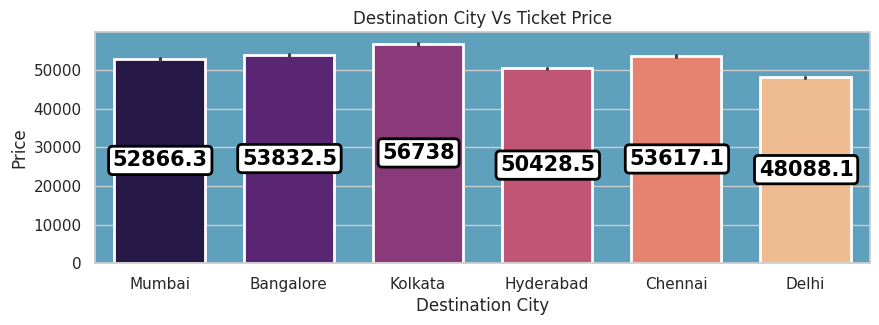

In [ ]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 3))
p = sns.barplot(x="source_city",y= "price" ,data=df_business, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Source City Vs Ticket Price")
plt.xlabel("Source City")
plt.ylabel("Price")
plt.show()

background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 3))
p = sns.barplot(y="price",x= "destination_city" ,data=df_business, palette='magma', edgecolor='white', linewidth=2, width=0.7)
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Destination City Vs Ticket Price")
plt.xlabel("Destination City")
plt.ylabel("Price")
plt.show()

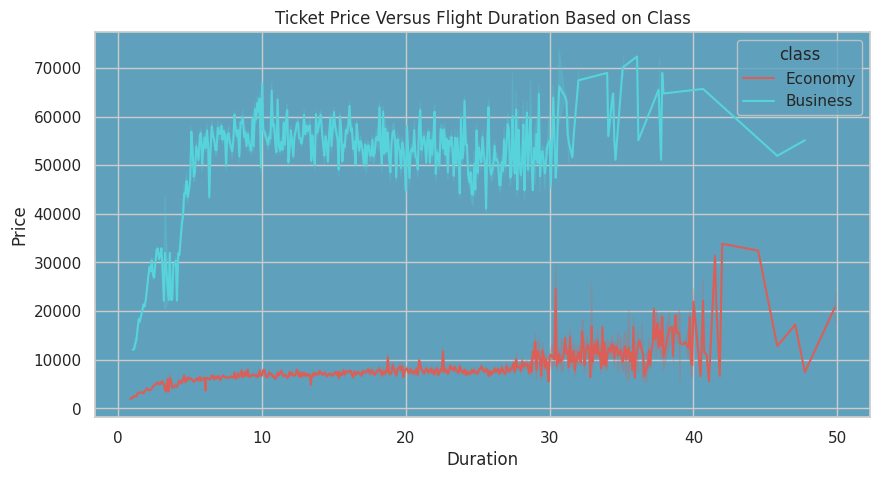

In [ ]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Ticket Price Versus Flight Duration Based on Class")
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

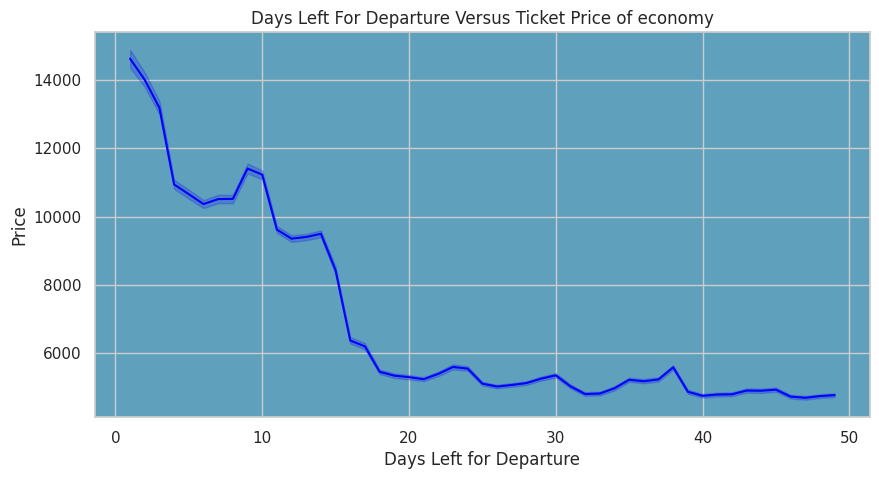

In [ ]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.lineplot(data=df_economy,x='days_left',y='price',color='blue')
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Days Left For Departure Versus Ticket Price of economy")
plt.xlabel("Days Left for Departure")
plt.ylabel("Price")
plt.show()

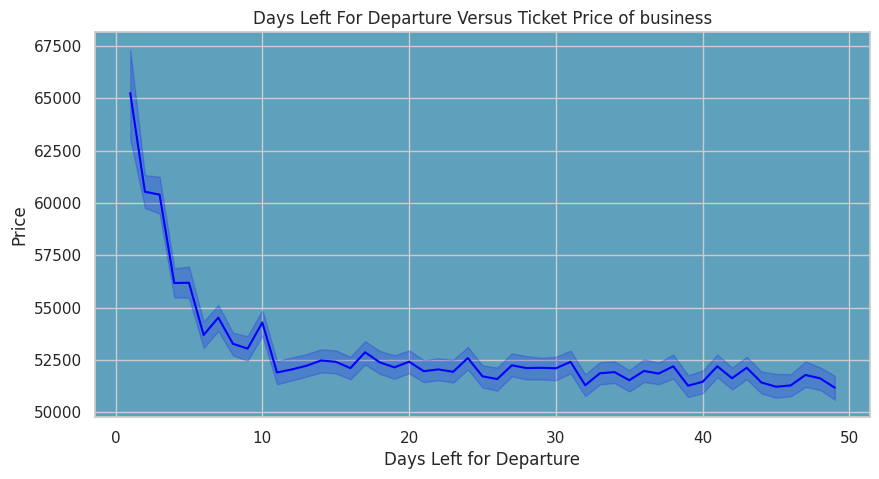

In [ ]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.lineplot(data=df_business,x='days_left',y='price',color='blue')
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Days Left For Departure Versus Ticket Price of business")
plt.xlabel("Days Left for Departure")
plt.ylabel("Price")
plt.show()

How Does Price Change Based on Days Left for Departure?

Ticket prices are significantly higher for all airlines when there are only two days remaining until departure, compared to other timeframes.

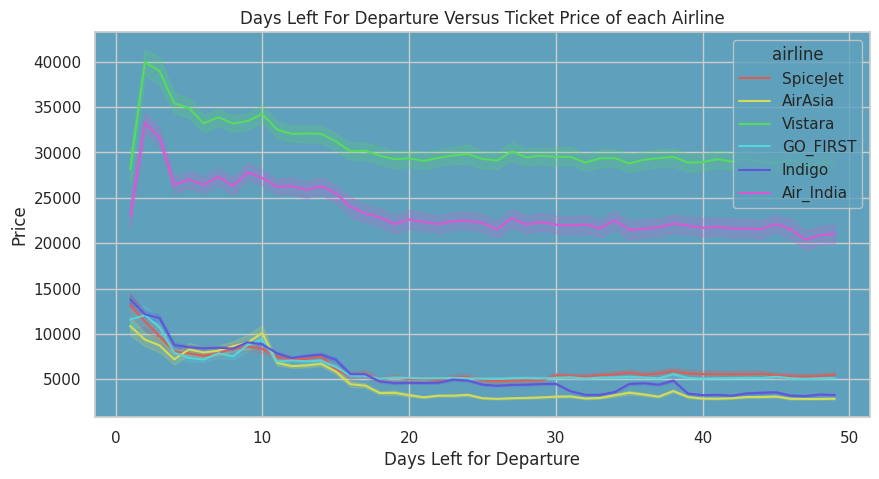

In [ ]:
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
plt.subplots(figsize=(10, 5))
p = sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=15, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Days Left For Departure Versus Ticket Price of each Airline")
plt.xlabel("Days Left for Departure")
plt.ylabel("Price")
plt.show()

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [12]:
from sklearn.preprocessing import PolynomialFeatures


In [13]:
trf=ColumnTransformer(
    [
      ('encode',OneHotEncoder(sparse_output= False,drop='first'),[0,1,2,3,4,5,6]) ,
      ('pow_tansform',PowerTransformer(),[7]),
      ('scale',StandardScaler(),[7,8]),
      ('poly',PolynomialFeatures(degree=2),[7,8])

    ],
    remainder='passthrough'
)

In [ ]:
trf1=ColumnTransformer(
    [
      ('encode',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5]) ,
      ('pow_tansform',PowerTransformer(),[6]),
      ('scale',StandardScaler(),[6,7]),
      ('poly',PolynomialFeatures(degree=2),[6,7])
    ],
    remainder='passthrough'
)

In [ ]:
df_copy=df.copy()
df_copy.head()
df_copy.duplicated().sum()

2213

In [ ]:
df_eco=df_copy[df_copy['class']=='Economy']
print(df_eco.head(2))
df_bus=df_copy[df_copy['class']=='Business']
print(df_eco.shape)
print(df_bus.shape)

    airline source_city departure_time stops arrival_time destination_city  \
0  SpiceJet       Delhi        Evening  zero        Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning  zero      Morning           Mumbai   

     class  duration  days_left  price  
0  Economy      2.17          1   5953  
1  Economy      2.33          1   5953  
(206666, 10)
(93487, 10)


##since both the classes makes our price bimodal so its preferable to segregate them before combined model prediction

In [ ]:
X_eco=df_eco.drop(['class','price'],axis=1)
Y_eco=df_eco['price']

In [ ]:
X_eco.head(2)
Y_eco.head()

,price
0,5953
1,5953
2,5956
3,5955
4,5955


In [ ]:
X_traine, X_teste, y_traine, y_teste = train_test_split(X_eco,Y_eco,test_size=0.1, random_state=42)

<Axes: xlabel='price', ylabel='Count'>

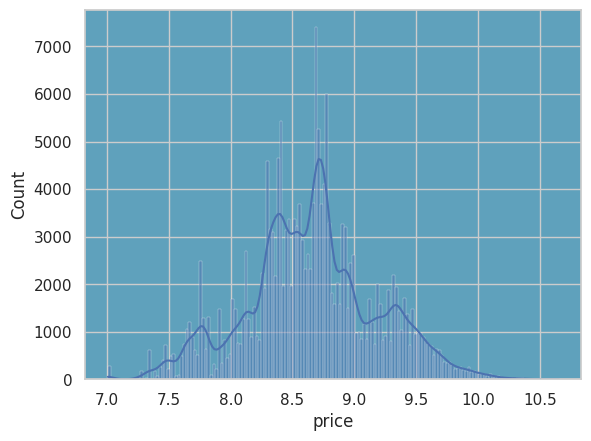

In [ ]:
sns.histplot(np.log(y_traine),kde=True)

In [ ]:
y_traine_trans=np.log(y_traine)
y_teste_trans=np.log(y_teste)

<Axes: ylabel='Count'>

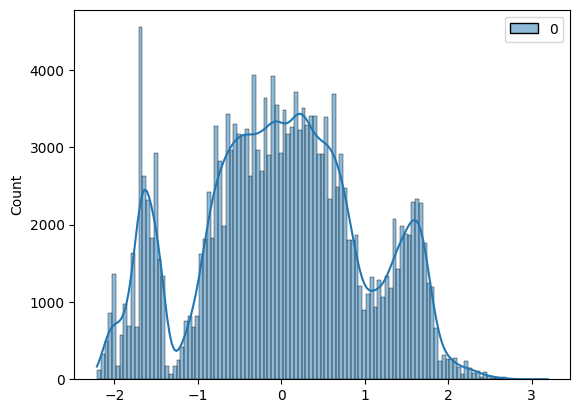

In [ ]:
sns.histplot(dur,kde=True)

In [ ]:
dur=PowerTransformer().fit_transform(X_traine.iloc[:,6].values.reshape(-1, 1))

In [ ]:
x_traine_trans=trf1.fit_transform(X_traine)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
x_teste_trans=trf1.transform(X_teste)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_traine_trans,y_traine_trans)

LinearRegression()

In [ ]:
x_teste_trans.shape

(20667, 36)

In [ ]:
y_prede=lr.predict(x_teste_trans)

In [ ]:
y_prede_train=lr.predict(x_traine_trans)

In [ ]:
r2_score(y_traine_trans,y_prede_train)

0.6657255410416503

In [ ]:
r2_score(y_teste_trans,y_prede)

0.6668400005538806

In [ ]:
residual=y_traine_trans-y_prede_train

checking assumption of linear regression

<Axes: ylabel='price'>

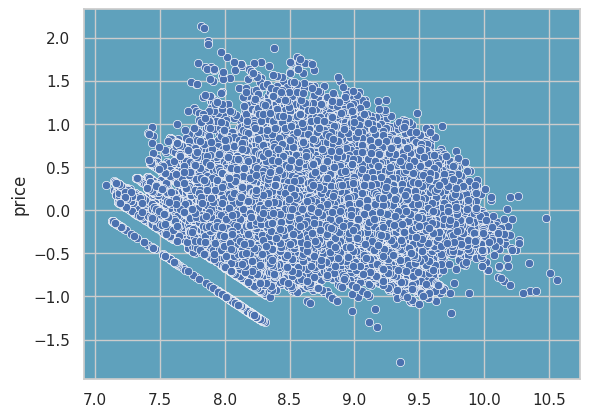

In [ ]:
##linearity
sns.scatterplot(x=y_prede_train,y=residual)
##since here is a pattern indicates problem with linearity assumption ,use poly(2) variable while fitting also increase r2 from 0.59 to 0.66

<Axes: ylabel='price'>

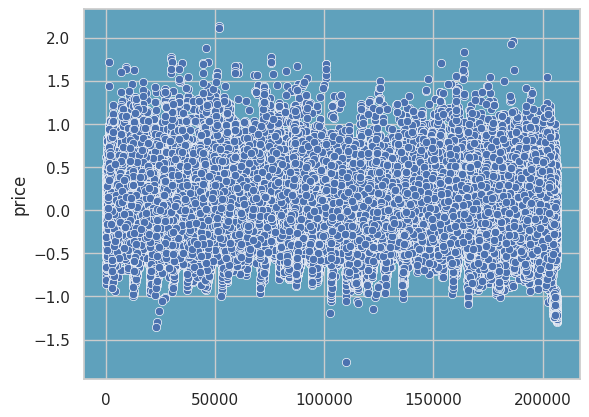

In [ ]:
##homoscedasticity hold
sns.scatterplot(residual)

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
df_copy.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
x_traine_trans.shape

(185999, 36)

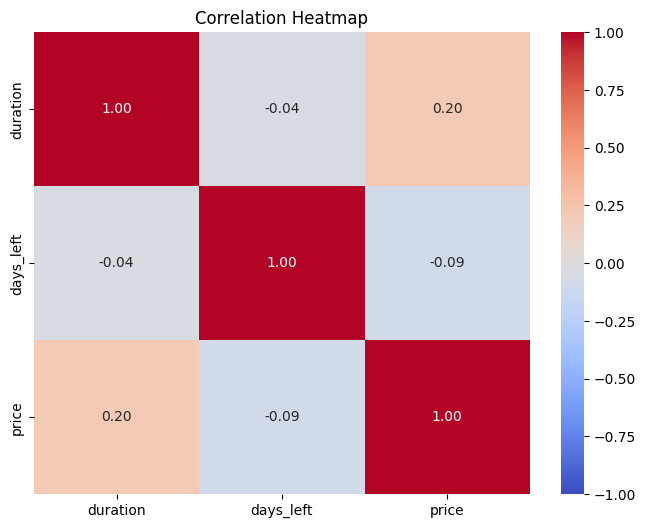

In [ ]:
subset_df = df_copy.iloc[:, 7:10]

# Compute the correlation matrix
corr_matrix = subset_df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
##no multicollinearity

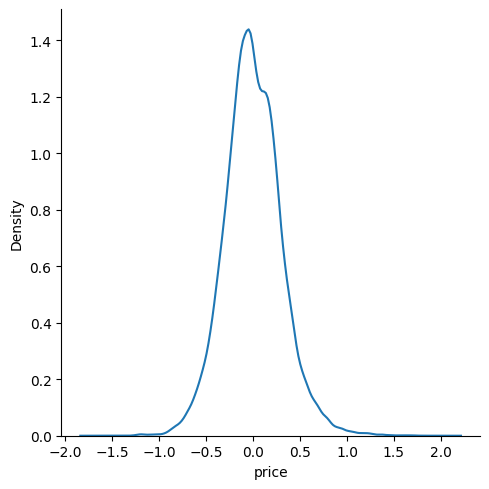

In [ ]:
##normality of residual holds
sns.displot(residual,kind='kde')

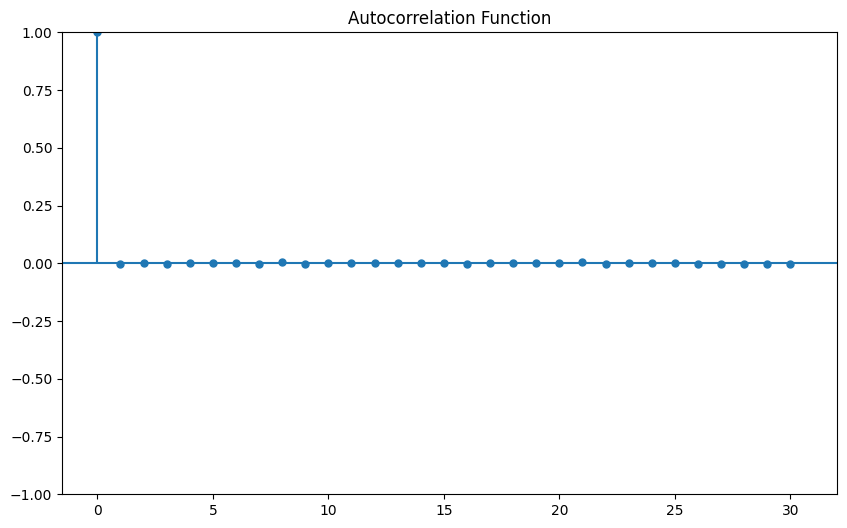

In [ ]:
##no autocorrelation of residual
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF for the residuals
plt.figure(figsize=(10, 6))
plot_acf(residual, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function')
plt.show()


combined study

In [7]:
df.head(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [19]:
x_trans=trf.fit_transform(df.drop(columns='price'))
y_trans=np.log(df.iloc[:,-1])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'),df.iloc[:,-1],test_size=0.2, random_state=42)

In [43]:
X_train.shape

(240122, 9)

<ipython-input-44-be7198922d51>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['duration'])


<Axes: xlabel='duration', ylabel='Density'>

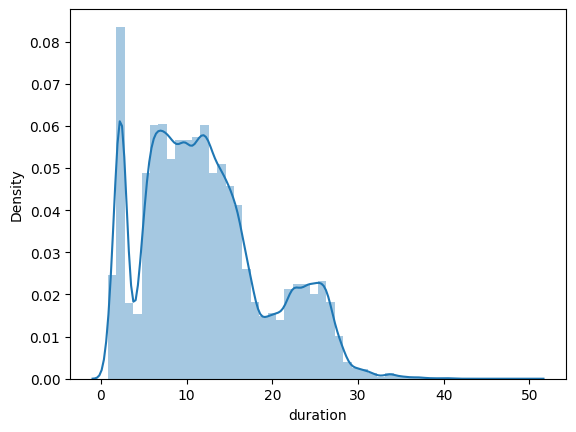

In [44]:
sns.distplot(X_train['duration'])

In [45]:
x_train_trans=trf.fit_transform(X_train)

In [46]:
x_test_trans=trf.transform(X_test)

In [47]:
y_train_trans=np.log(y_train)
y_test_trans=np.log(y_test)

In [48]:
x_train_trans.shape

(240122, 37)

In [35]:
x=df.iloc[:,0:9]
x.sample()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
248659,Air_India,Bangalore,Early_Morning,one,Night,Mumbai,Business,17.42,2


In [ ]:
y=df.iloc[:,-1]
y.sample()

,price
183025,3916


In [49]:
lr=LinearRegression()

In [50]:
lr.fit(x_train_trans,y_train_trans)

LinearRegression()

In [51]:
y_pred=lr.predict(x_test_trans)

In [52]:
y_pred_train=lr.predict(x_train_trans)

In [53]:
r2_score(y_train_trans,y_pred_train)

0.9257589960099532

In [54]:
r2_score(y_test_trans,y_pred)

0.9267725252669938

In [20]:
from sklearn.model_selection import cross_val_score

In [ ]:
res=y_train_trans-y_pred_train

<Axes: xlabel='price', ylabel='price'>

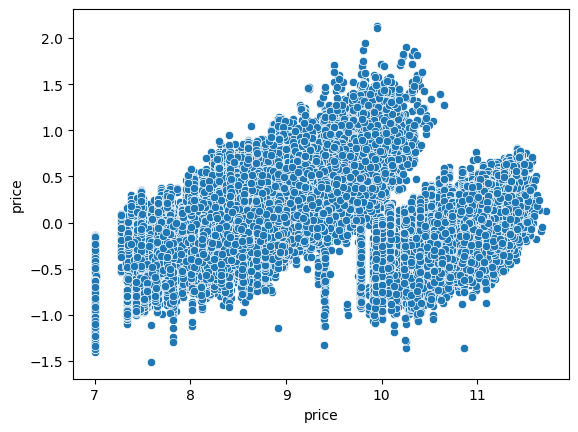

In [ ]:
##linearity
sns.scatterplot(x=y_train_trans,y=res)

<Axes: ylabel='price'>

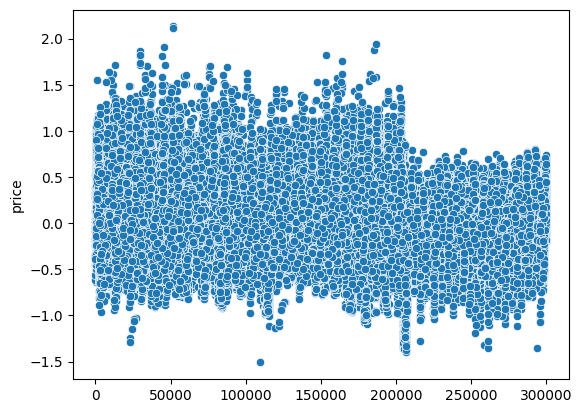

In [ ]:
##homoscedasticity
sns.scatterplot(res)

<Axes: xlabel='price', ylabel='Density'>

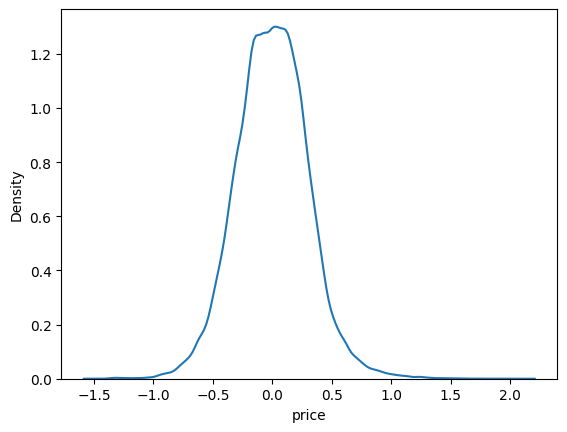

In [ ]:
sns.kdeplot(res)

In [ ]:
z=pd.DataFrame(x_train_trans)

In [ ]:
z.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.012003,1.001730,-1.474883,1.0,19.42,6.0,377.1364,116.52,36.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-0.639665,-0.724634,-0.958973,1.0,7.00,13.0,49.0000,91.00,169.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.191234,1.244978,1.325771,1.0,21.17,44.0,448.1689,931.48,1936.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,-0.114125,-0.272888,-1.106376,1.0,10.25,11.0,105.0625,112.75,121.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.692040,1.985842,-1.548584,1.0,26.50,5.0,702.2500,132.50,25.0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:

def handle_multi_collinearity(X, threshold = 10):
    '''Calculate VIF and drop columns one by one with maximum vif, if greater than or equal to given threshold(default 10)'''
    max_vif = threshold + 1
    count = 0
    while True:
        vif = pd.DataFrame()
        vif["variables"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        max_vif = np.max(vif["VIF"])
        if max_vif > threshold:
            index = np.argmax(vif["VIF"])
            print(f'Column dropped: {vif.loc[index, "variables"]}')
            X.drop(columns = vif.loc[index, "variables"], inplace = True)
            count += 1
        else:
            break
    if count == 0:
        print('No columns dropped')
    print("Final VIF:\n", vif)

In [ ]:
handle_multi_collinearity(z)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Column dropped: 29


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Column dropped: 30
Column dropped: 31
Column dropped: 32
Column dropped: 33
Column dropped: 34
Column dropped: 35
Final VIF:
     variables       VIF
0           0  4.550195
1           1  1.958810
2           2  2.890622
3           3  1.444718
4           4  6.383525
5           5  1.706197
6           6  2.091921
7           7  1.752528
8           8  1.830794
9           9  2.138518
10         10  2.249923
11         11  2.329862
12         12  1.047080
13         13  2.355256
14         14  2.027484
15         15  1.114022
16         16  2.158467
17         17  1.410149
18         18  2.782893
19         19  1.340028
20         20  2.519668
21         21  3.086721
22         22  1.762669
23         23  2.068748
24         24  1.786130
25         25  1.910986
26         26  2.130882
27         27  3.683477
28         28  2.396273
29         36  2.365595


No multicollinearity almost all vif less than 5

In [ ]:
trf2=ColumnTransformer(
    [
      ('encode',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,3,4,5,6]) ,
      ('pow_tansform',PowerTransformer(),[7]),
      ('scale',StandardScaler(),[7,8]),
      ('poly',PolynomialFeatures(degree=2),[7,8])
    ],
    remainder='passthrough'
)

In [ ]:
x_train_trans1=trf2.fit_transform(X_train)

In [ ]:
x_test_trans1=trf2.transform(X_test)

In [ ]:
print(x_train_trans1.shape)
print(x_test_trans1.shape)



(240122, 37)
(60031, 37)


regularisation

In [ ]:

from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.01)

In [ ]:
clf.fit(x_train_trans1,y_train_trans)

Lasso(alpha=0.01)

In [ ]:
y_pred_lasso=clf.predict(x_test_trans1)

In [ ]:
r2_score(y_test_trans,y_pred_lasso)

0.9100701545913727

In [ ]:
adjusted_r2 = adjusted_r_squared(r2_score(y_test_trans,y_pred_lasso), X_test.shape)
print(adjusted_r2)

0.910058168340277


In [ ]:
clf.n_iter_

277

In [ ]:
x_test_trans1=trf2.transform(X_test)

In [ ]:
rf=RandomForestRegressor(n_estimators=100,max_features=0.3)

In [ ]:
rf.fit(x_train_trans1,y_train_trans)

RandomForestRegressor(max_features=0.3)

In [ ]:
y_pred_rf=rf.predict(x_test_trans1)

In [ ]:
r2_score(y_test_trans,y_pred_rf)

0.9858724182250536

In [ ]:
param={
    'n_estimators':[20,50,100],
    'max_depth':[5,10,20,None],
    'max_features':[0.1,0.2,0.3,0.4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf=GridSearchCV(RandomForestRegressor(),param)

In [ ]:
clf.fit(x_train_trans1,y_train_trans)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': [0.1, 0.2, 0.3, 0.4],
                         'n_estimators': [20, 50, 100]})

In [ ]:
clf.best_score_

0.9850866527269728

In [ ]:
clf.best_params_

{'max_depth': None, 'max_features': 0.3, 'n_estimators': 100}